# VISUALIZATION FOR TESTING

C:\Users\Elena\AppData\Local\Temp\ipykernel_28676\2829440054.py:40: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  building_clip.plot(ax=ax1, color='gray', alpha=0.6)
C:\Users\Elena\AppData\Local\Temp\ipykernel_28676\2829440054.py:54: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  building_clip.plot(ax=ax2, color='lightgray', alpha=0.3)
C:\Users\Elena\AppData\Local\Temp\ipykernel_28676\2829440054.py:65: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  building_clip.plot(ax=ax3, color='lightgray', alpha=0.3)
C:\Users\Elena\AppData\Local\Temp\ipykernel_28676\2829440054.py:76: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  building_clip.plot(ax=ax4, color='lightgray', alpha=0.3)


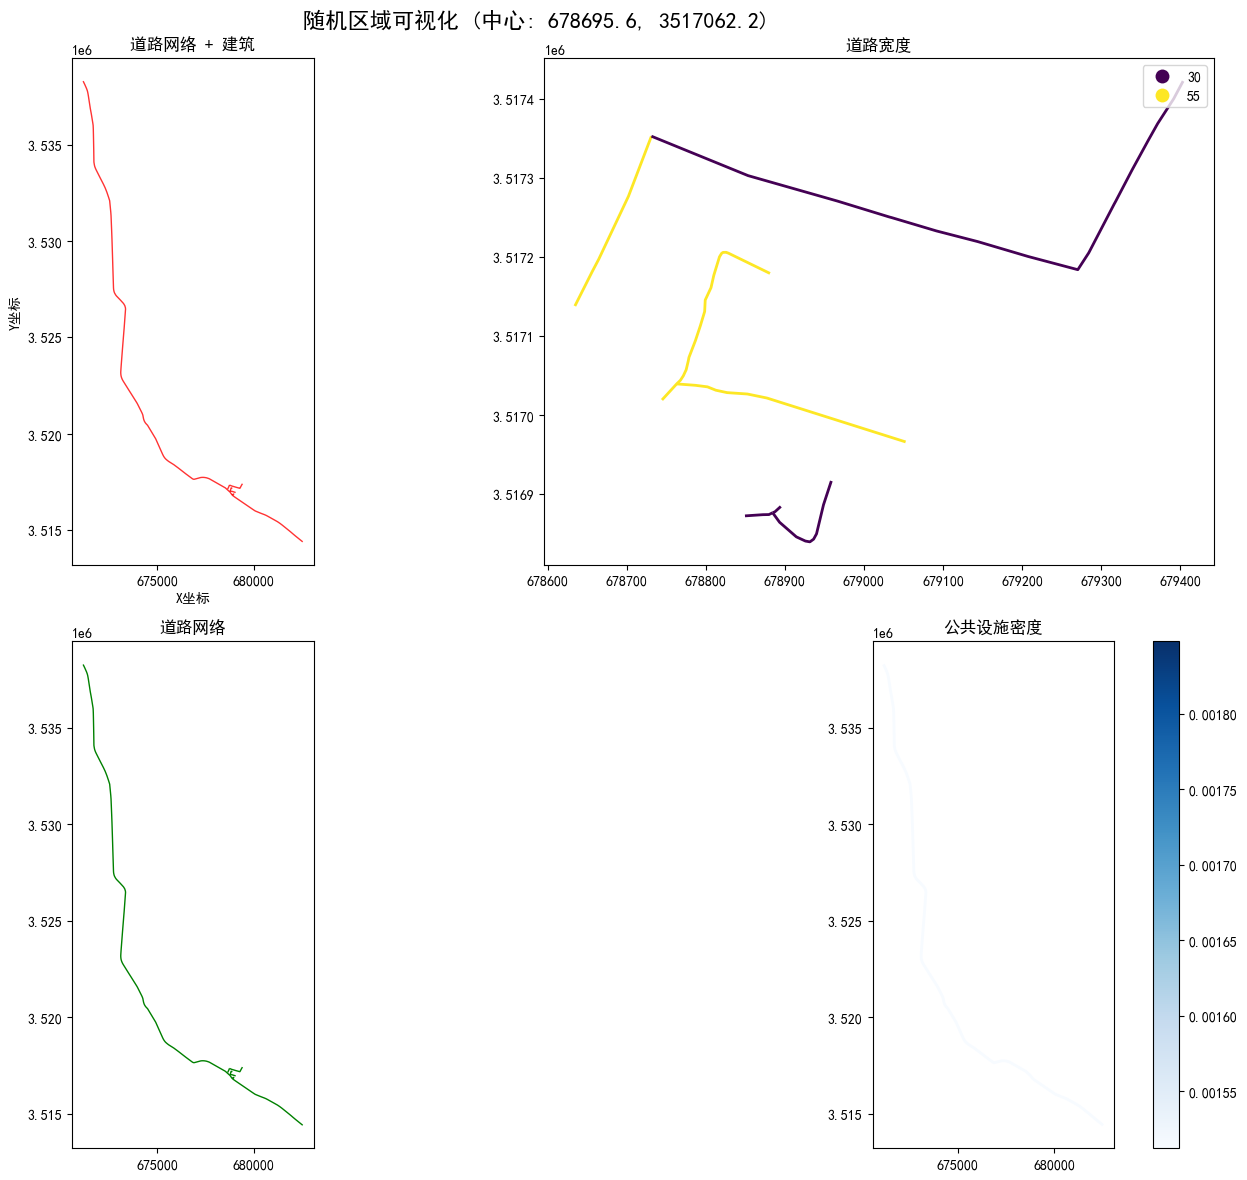

截取区域统计:
道路段数量: 8
建筑数量: 0


TypeError: '<=' not supported between instances of 'float' and 'str'

In [7]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box
import random

# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

def visualize_random_area(street_data, building_data, size=500):
    """
    随机截取指定大小的区域并可视化
    """
    # 获取整个数据集的边界
    bounds = street_data.total_bounds
    
    # 随机选择一个中心点
    center_x = random.uniform(bounds[0], bounds[2])
    center_y = random.uniform(bounds[1], bounds[3])
    
    # 创建500x500米的边界框
    half_size = size / 2
    bbox = box(center_x - half_size, center_y - half_size, 
               center_x + half_size, center_y + half_size)
    
    # 截取道路数据
    street_clip = street_data[street_data.geometry.intersects(bbox)]
    
    # 截取建筑数据
    building_clip = building_data[building_data.geometry.intersects(bbox)]
    
    # 创建子图
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle(f'随机区域可视化 (中心: {center_x:.1f}, {center_y:.1f})', fontsize=16)
    
    # 1. 道路网络
    ax1 = axes[0, 0]
    street_clip.plot(ax=ax1, color='red', linewidth=1, alpha=0.8)
    building_clip.plot(ax=ax1, color='gray', alpha=0.6)
    ax1.set_title('道路网络 + 建筑')
    ax1.set_xlabel('X坐标')
    ax1.set_ylabel('Y坐标')
    
    # 2. 道路宽度可视化
    ax2 = axes[0, 1]
    if 'width' in street_clip.columns:
        street_clip.plot(column='width', ax=ax2, cmap='viridis', 
                        legend=True, linewidth=2)
        ax2.set_title('道路宽度')
    else:
        street_clip.plot(ax=ax2, color='blue', linewidth=1)
        ax2.set_title('道路网络')
    building_clip.plot(ax=ax2, color='lightgray', alpha=0.3)
    
    # 3. POI密度可视化
    ax3 = axes[1, 0]
    if 'count' in street_clip.columns:
        street_clip.plot(column='count', ax=ax3, cmap='Reds', 
                        legend=True, linewidth=2)
        ax3.set_title('POI密度')
    else:
        street_clip.plot(ax=ax3, color='green', linewidth=1)
        ax3.set_title('道路网络')
    building_clip.plot(ax=ax3, color='lightgray', alpha=0.3)
    
    # 4. 综合特征可视化
    ax4 = axes[1, 1]
    if 'public_den' in street_clip.columns:
        street_clip.plot(column='public_den', ax=ax4, cmap='Blues', 
                        legend=True, linewidth=2)
        ax4.set_title('公共设施密度')
    else:
        street_clip.plot(ax=ax4, color='purple', linewidth=1)
        ax4.set_title('道路网络')
    building_clip.plot(ax=ax4, color='lightgray', alpha=0.3)
    
    # 调整布局
    plt.tight_layout()
    plt.show()
    
    # 打印统计信息
    print(f"截取区域统计:")
    print(f"道路段数量: {len(street_clip)}")
    print(f"建筑数量: {len(building_clip)}")
    if 'count' in street_clip.columns:
        print(f"POI密度范围: {street_clip['count'].min():.2f} - {street_clip['count'].max():.2f}")
    if 'width' in street_clip.columns:
        print(f"道路宽度范围: {street_clip['width'].min():.2f} - {street_clip['width'].max():.2f}")

# 使用示例
# 假设你已经加载了数据
street_data = gpd.read_file('data_for_test/Street.geojson')
building_data = gpd.read_file('data_for_test/meters_data/building_meters.shp')

# 调用函数
visualize_random_area(street_data, building_data, size=500)

In [5]:
import pickle

def quick_check_fields(pkl_path="models/data/route_graphs.pkl"):
    """快速查看route_graphs.pkl中的字段"""
    
    with open(pkl_path, 'rb') as f:
        route_graphs = pickle.load(f)
    
    print(f"总图数量: {len(route_graphs)}")
    
    # 查看第一个图的字段
    if route_graphs:
        G = route_graphs[6]['graph']
        
        print("\n=== 节点字段 ===")
        for node, attrs in list(G.nodes(data=True))[:3]:  # 只看第一个节点
            for key, value in attrs.items():
                print(f"{key}: {type(value).__name__} = {value}")
        
        print("\n=== 边字段 ===")
        for u, v, attrs in list(G.edges(data=True))[:2]:  # 只看第一条边
            for key, value in attrs.items():
                print(f"{key}: {type(value).__name__} = {value}")

# 运行
quick_check_fields()

总图数量: 2161

=== 节点字段 ===
geometry: LineString = LINESTRING (671484.9336906135 3548246.623960661, 671487.678409415 3548252.2240049457, 671491.393476276 3548256.733609052, 671496.0620081763 3548260.145835845, 671500.7491082133 3548262.4549285634, 671505.4905687533 3548262.5447327476, 671512.1201357597 3548261.558442148, 671517.8336221448 3548259.4488469805, 671522.6684001627 3548253.9963686713, 671522.7804572937 3548247.3409638056, 671520.0356810144 3548241.7453440535, 671516.3206202226 3548237.235729292, 671511.6521581254 3548233.81905877, 671506.0133376289 3548231.4928302825, 671499.3854025226 3548231.3712684857, 671493.6906248622 3548232.3688686895, 671488.9101377594 3548235.6065044277, 671485.978637465 3548241.1021263236, 671484.9336906135 3548246.623960661)
length: float = 108.55890716612171
width: str = 30
highway: str = street
height_mean: float = nan
frontage_L_mean: float = nan
public_den: float = nan
transport_den: float = 0.00921
nvdi_mean: float = 0.3311717361211777
hop_level

C:\Users\Elena\AppData\Local\Temp\ipykernel_14628\1842555231.py:67: UserWarning: Glyph 22352 (\N{CJK UNIFIED IDEOGRAPH-5750}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_14628\1842555231.py:67: UserWarning: Glyph 26631 (\N{CJK UNIFIED IDEOGRAPH-6807}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_14628\1842555231.py:67: UserWarning: Glyph 21487 (\N{CJK UNIFIED IDEOGRAPH-53EF}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_14628\1842555231.py:67: UserWarning: Glyph 35270 (\N{CJK UNIFIED IDEOGRAPH-89C6}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_14628\1842555231.py:67: UserWarning: Glyph 21270 (\N{CJK UNIFIED IDEOGRAPH-5316}) missing from current font.
  plt.tight_layout()
C:\Users\Elena\AppData\Local\Temp\ipykernel_14628\1842555231.py:67: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) miss

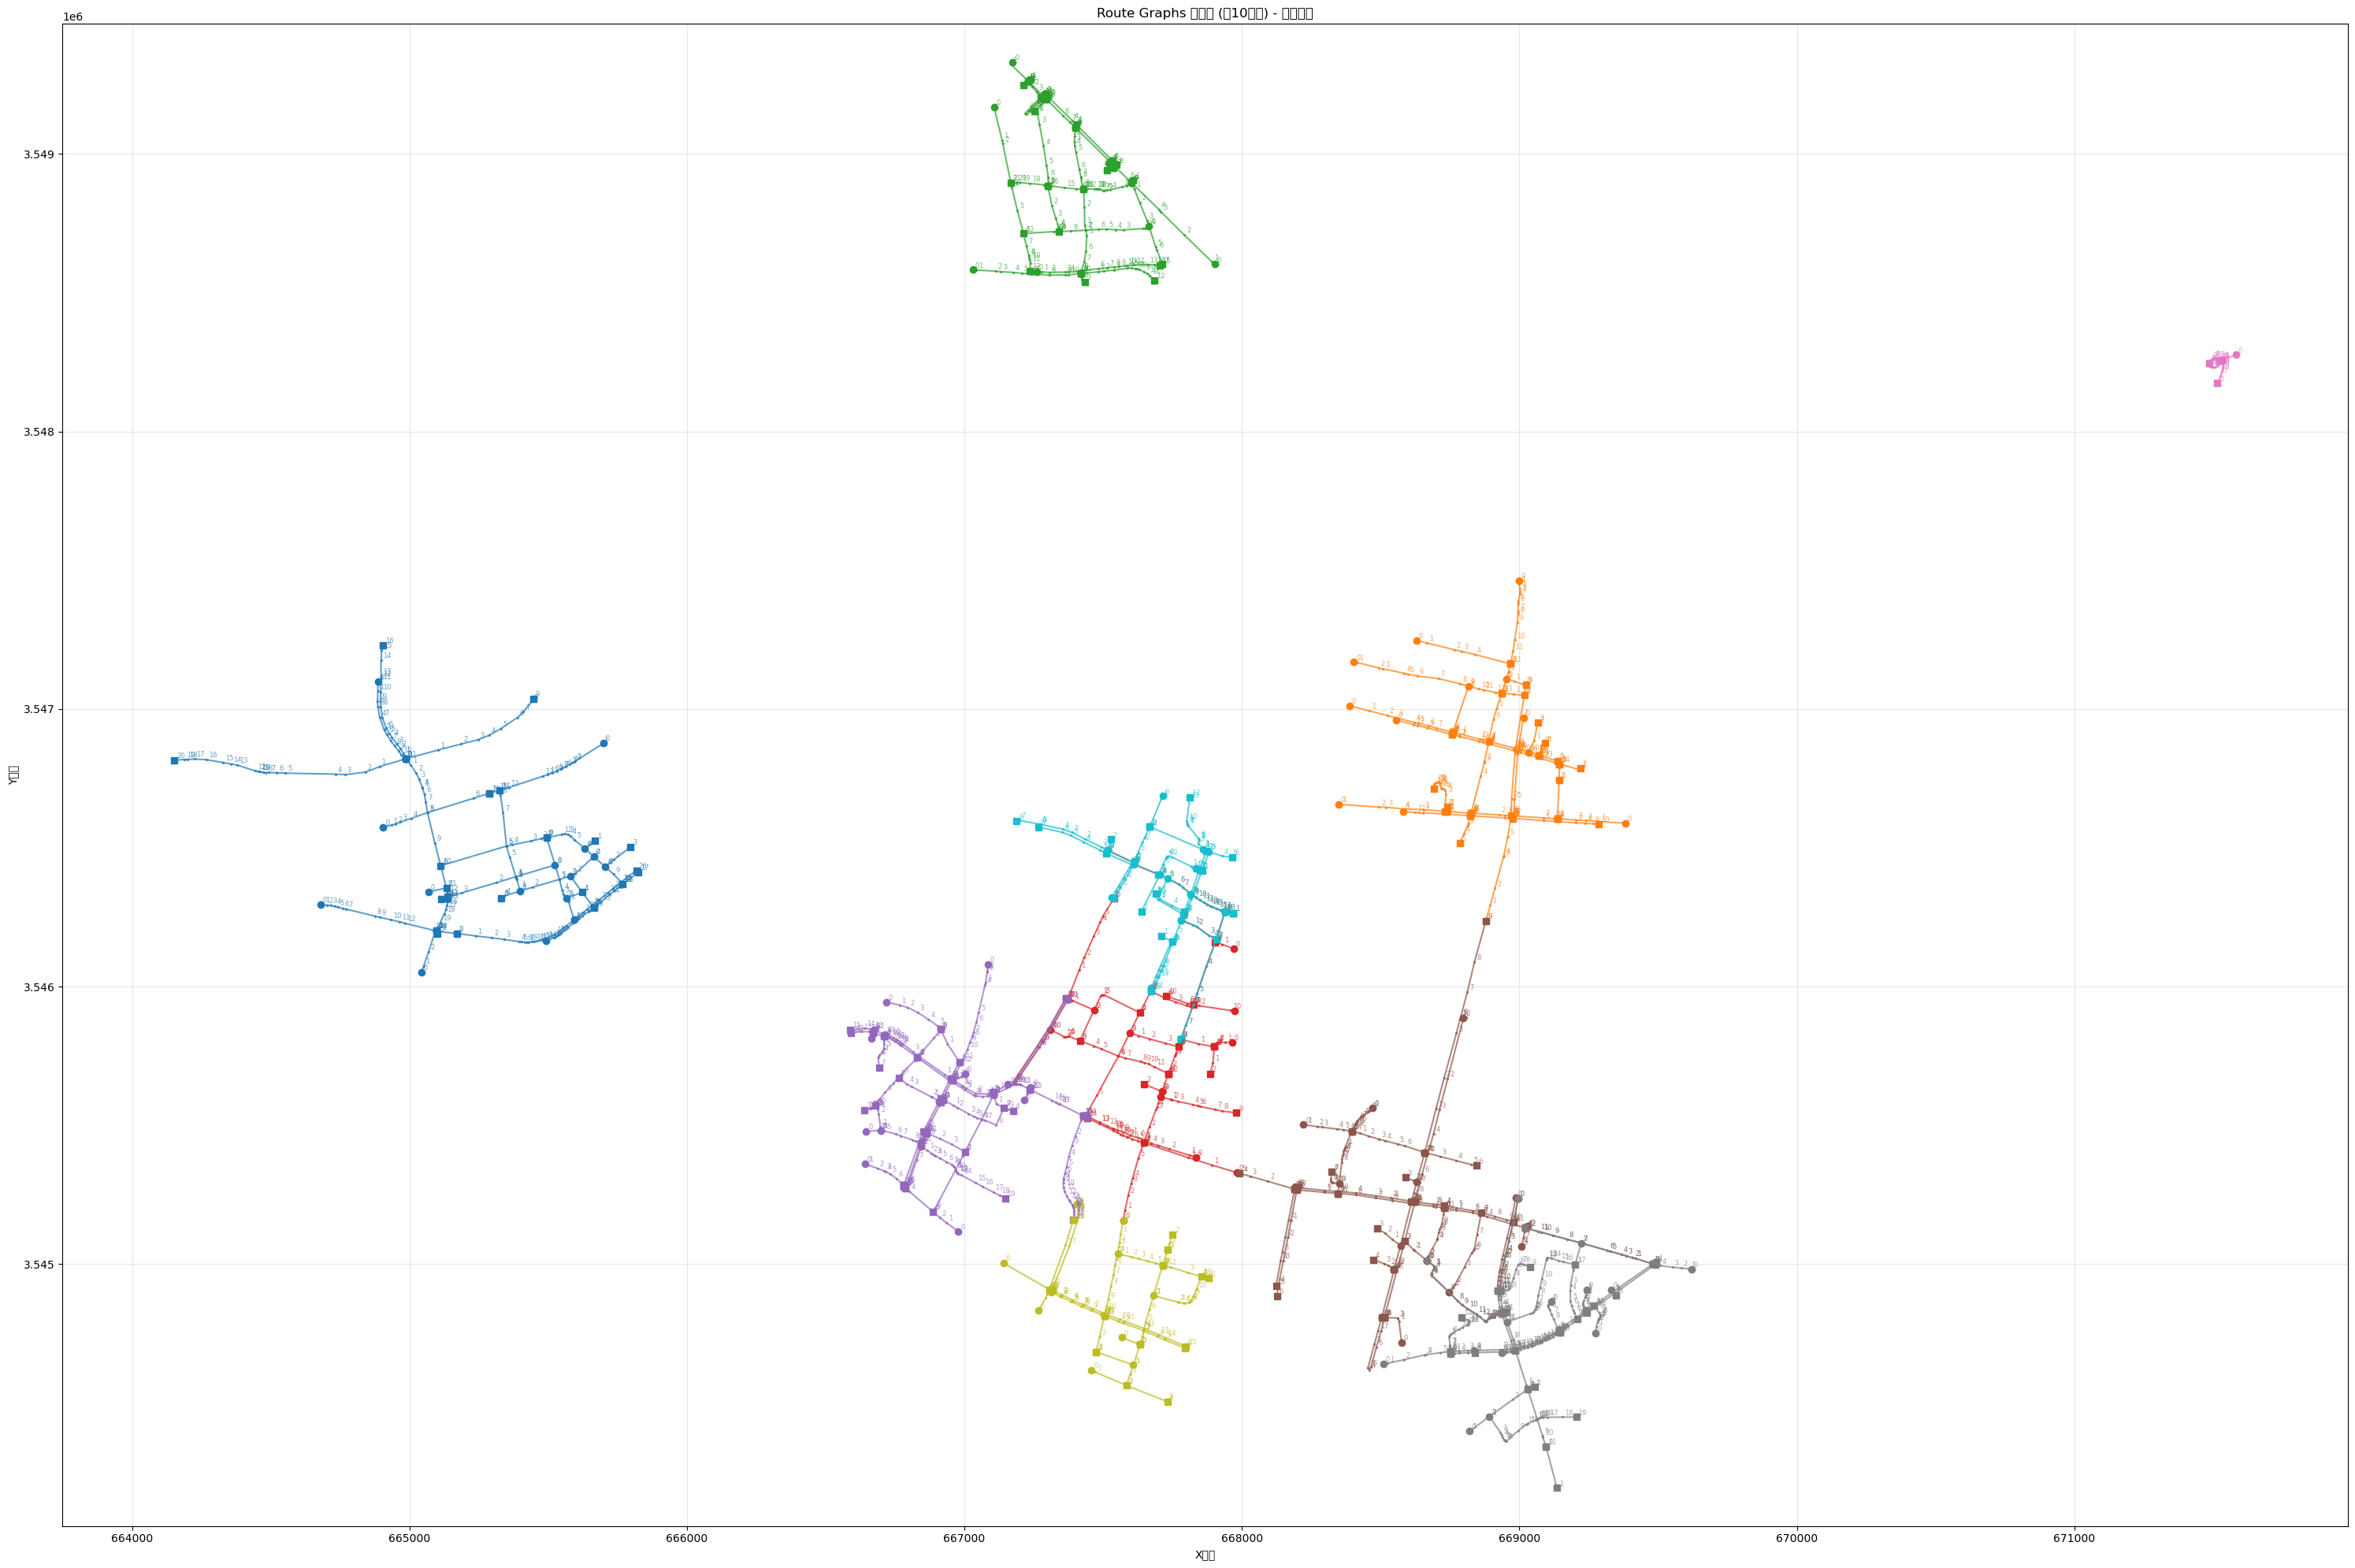

In [12]:
import pickle
import matplotlib.pyplot as plt
from shapely.geometry import LineString

def visualize_route_graphs(pkl_path, num_graphs=3):
    """
    从route_graphs.pkl中提取并可视化LineString
    
    Args:
        pkl_path: pkl文件路径
        num_graphs: 要可视化的图数量
    """
    with open(pkl_path, 'rb') as f:
        route_graphs = pickle.load(f)
    
    plt.figure(figsize=(30, 20))
    
    for i in range(min(num_graphs, len(route_graphs))):
        graph_data = route_graphs[i]
        nx_graph = graph_data['graph']
        
        color = plt.cm.tab10(i)
        
        for node, attrs in nx_graph.nodes(data=True):
            geometry = attrs.get('geometry')
            if geometry:
                # 检查geometry是否已经是LineString对象
                if isinstance(geometry, LineString):
                    line = geometry
                else:
                    # 如果是字符串，才需要解析
                    from shapely import wkt
                    line = wkt.loads(geometry)
                
                coords = list(line.coords)
                x_coords = [coord[0] for coord in coords]
                y_coords = [coord[1] for coord in coords]
                
                # 绘制LineString
                plt.plot(x_coords, y_coords, color=color, linewidth=1.5, alpha=0.7)
                
                # 在起点和终点添加特殊标记
                plt.plot(x_coords[0], y_coords[0], 'o', color=color, markersize=6, label='起点' if i == 0 and node == list(nx_graph.nodes())[0] else "")
                plt.plot(x_coords[-1], y_coords[-1], 's', color=color, markersize=6, label='终点' if i == 0 and node == list(nx_graph.nodes())[0] else "")
                
                # 在所有拐点处添加节点标记
                for j, (x, y) in enumerate(coords):
                    if j == 0:
                        # 起点用圆圈
                        plt.plot(x, y, 'o', color=color, markersize=4, alpha=0.8)
                    elif j == len(coords) - 1:
                        # 终点用方块
                        plt.plot(x, y, 's', color=color, markersize=4, alpha=0.8)
                    else:
                        # 中间拐点用小圆点
                        plt.plot(x, y, '.', color=color, markersize=3, alpha=0.6)
                    
                    # 可选：添加拐点编号标注
                    plt.annotate(f'{j}', (x, y), xytext=(2, 2), textcoords='offset points', 
                                fontsize=6, color=color, alpha=0.7)
    
    plt.xlabel('X坐标')
    plt.ylabel('Y坐标')
    plt.title(f'Route Graphs 可视化 (前{num_graphs}个图) - 拐点节点')
    plt.grid(True, alpha=0.3)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

# 使用
visualize_route_graphs("models/data/route_graphs.pkl", num_graphs=10)